<a href="https://colab.research.google.com/github/ustyuzhaninky/OSAR-keras/blob/master/colab/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OSAR visulization

**Author:** [Konstantin Ustyuzhanin](https://www.facebook.com/konstantin.ustuzhanin/)<br>
**Date created:** 2020/09/16<br>
**Last modified:** 2020/12/8<br>
**Description:** Implement Objective Stimuli Active Repeater (OSAR) internal function visualization.

In [1]:
!pip install ../../OSAR-keras/.

Processing d:\jorgen\projects\python\phdsub\towerproject\osar-keras
  Created wheel for OSAR: filename=OSAR-0.1.0-py3-none-any.whl size=55567 sha256=475b3d616b08cb51d00abad252200a8777922cd4145d58f5ba15aa26457db283
  Stored in directory: c:\users\jorgen\appdata\local\pip\cache\wheels\b6\c9\f1\be746c2bb5db17151768ace028249ef7030406506a993d63a7
Successfully built OSAR
  Attempting uninstall: OSAR
    Found existing installation: OSAR 0.1.0
    Uninstalling OSAR-0.1.0:
      Successfully uninstalled OSAR-0.1.0


In [2]:
import os
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
os.environ['TF_KERAS'] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))
# Configuration parameters for the whole setup
seed = 42

TensorFlow version: 2.3.0
Eager execution: True


batch_size=1250
Model: "sequential_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
helix_memory_138 (HelixMemor (1, 24, 1)                24        
Total params: 24
Trainable params: 0
Non-trainable params: 24
_________________________________________________________________
Model: "sequential_139"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
helix_memory_139 (HelixMemor (1, 24, 1)                24        
Total params: 24
Trainable params: 0
Non-trainable params: 24
_________________________________________________________________
Model: "sequential_140"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
helix_memory_140 (HelixMemor (1, 24, 1)                248       
Total params: 248
Trainable params: 224
Non-trainable params: 

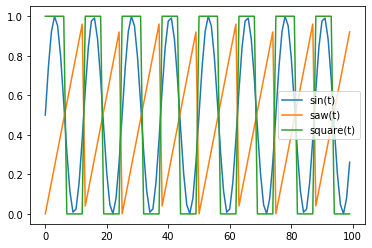

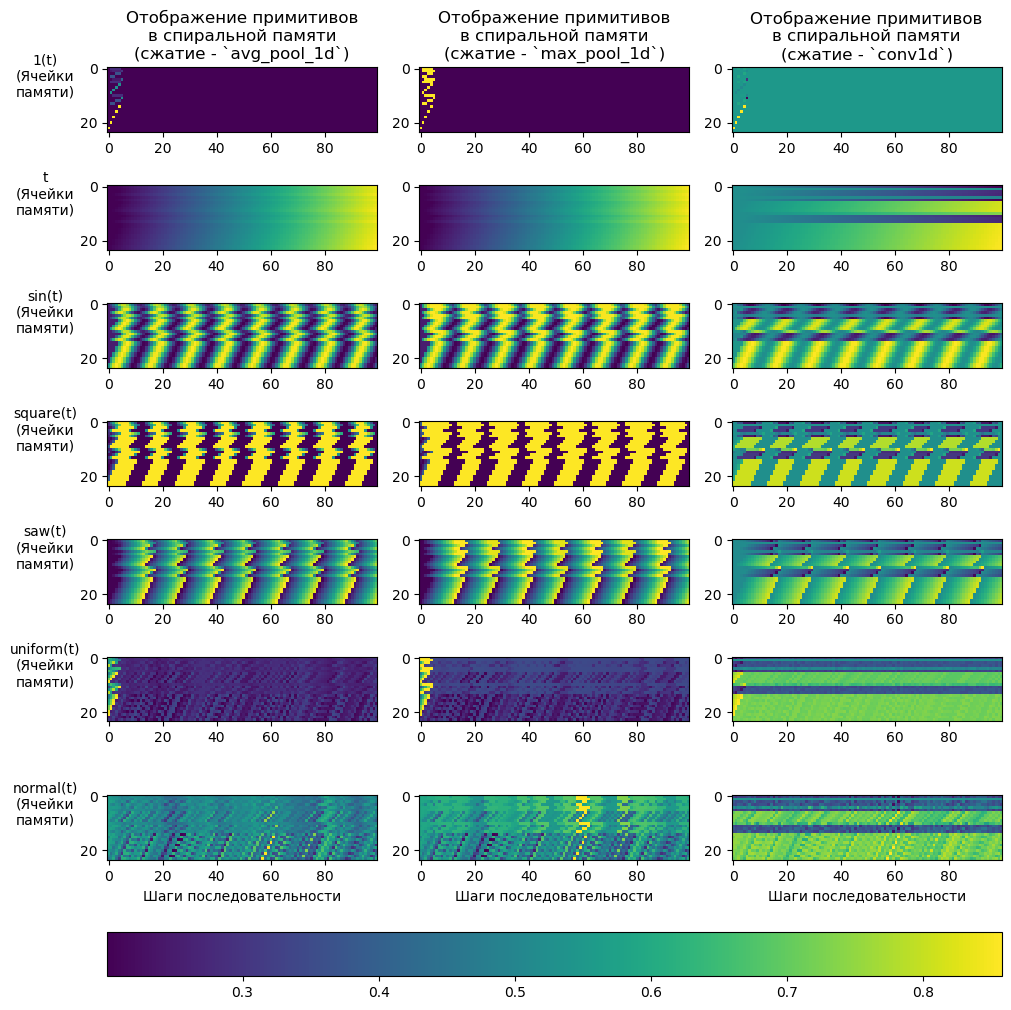

In [52]:
from OSAR import HelixMemory
from scipy import signal
import matplotlib.pyplot as plt

n_samples = 8
n_features = 1
test_samples = 100
memory_len = 10
n_turns = 3
sampling_rate = 10000
frequency = 100
batch_size = int(np.floor(sampling_rate / n_samples))
print(f'batch_size={batch_size}')

total_memory = memory_len + sum(pow(2, i) for i in range(1, n_turns+1))

# Models
model_avg = tf.keras.models.Sequential([
    HelixMemory(1, memory_len, n_turns, 2, mode='avg', input_shape=(n_samples, n_features))
])
model_avg.summary()
model_avg.compile(optimizer='adam', loss='mse')

model_max = tf.keras.models.Sequential([
    HelixMemory(1, memory_len, n_turns, 2, mode='max', input_shape=(n_samples, n_features))
])
model_max.summary()
model_max.compile(optimizer='adam', loss='mse')

model_conv = tf.keras.models.Sequential([
    HelixMemory(1, memory_len, n_turns, 2, mode='conv', input_shape=(n_samples, n_features))
])
model_conv.summary()
model_conv.compile(optimizer='adam', loss='mse')

# Data

ts = np.reshape(np.linspace(0, 1, sampling_rate, endpoint=True), (batch_size, n_samples, n_features))[:test_samples]
blip = np.zeros_like(ts)
blip[0][0][0] = 1
# blip = tf.constant(blip, dtype=tf.float32)
line = ts
sine = np.sin(2 * np.pi * frequency * ts) / 2 + 0.5
square = signal.square(2 * np.pi * frequency * ts) / 2 + 0.5
saw = signal.sawtooth(2 * np.pi * frequency * ts) / 2 + 0.5
uniform = np.random.uniform(size=(test_samples, n_samples, n_features)) / 10 + 0.5
normal = np.random.normal(size=(test_samples, n_samples, n_features)) / 10 + 0.5

# model.fit(x=uniform, y=uniform, epochs=100)

# plt.plot(line[:, 0, 0])
plt.plot(sine[:, 0, 0], label='sin(t)')
plt.plot(saw[:, 0, 0], label='saw(t)')
plt.plot(square[:, 0, 0], label='square(t)')
# plt.plot(blip[:, 0, 0], label='1(t)')
# plt.plot(uniform[:, 0, 0], label='uniform(t)')
# plt.plot(normal[:, 0, 0], label='normal(t)')
plt.legend()
plt.show()

# Filter train
def process(model, x):
    prd = model.predict(x, batch_size=1)
    return prd

blip_mem = [process(model_avg, blip), process(model_max, blip), process(model_conv, blip)]
line_mem = [process(model_avg, line), process(model_max, line), process(model_conv, line)]
sine_mem = [process(model_avg, sine), process(model_max, sine), process(model_conv, sine)]
square_mem = [process(model_avg, square), process(model_max, square), process(model_conv, square)]
saw_mem = [process(model_avg, saw), process(model_max, saw), process(model_conv, saw)]
uniform_mem = [process(model_avg, uniform), process(model_max, uniform), process(model_conv, uniform)]
normal_mem = [process(model_avg, normal), process(model_max, normal), process(model_conv, normal)]

# Plot
fig_gif1, axs_gif1 = plt.subplots(nrows=7, ncols=3, dpi=100, figsize=(10,10), constrained_layout=True)
axs_gif1[0, 0].set_title('Отображение примитивов\nв спиральной памяти\n(сжатие - `avg_pool_1d`)')
axs_gif1[0, 0].imshow(np.transpose(blip_mem[0][:, :, 0]))
axs_gif1[0, 0].set_ylabel('1(t)\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[0, 1].set_title('Отображение примитивов\nв спиральной памяти\n(сжатие - `max_pool_1d`)')
axs_gif1[0, 1].imshow(np.transpose(blip_mem[1][:, :, 0]))
axs_gif1[0, 2].set_title('Отображение примитивов\nв спиральной памяти\n(сжатие - `conv1d`)')
axs_gif1[0, 2].imshow(np.transpose(blip_mem[2][:, :, 0]))

axs_gif1[1, 0].imshow(np.transpose(line_mem[0][:, :, 0]))
axs_gif1[1, 0].set_ylabel('t\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[1, 1].imshow(np.transpose(line_mem[1][:, :, 0]))
axs_gif1[1, 2].imshow(np.transpose(line_mem[2][:, :, 0]))

axs_gif1[2, 0].imshow(np.transpose(sine_mem[0][:, :, 0]))
axs_gif1[2, 0].set_ylabel('sin(t)\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[2, 1].imshow(np.transpose(sine_mem[1][:, :, 0]))
axs_gif1[2, 2].imshow(np.transpose(sine_mem[2][:, :, 0]))

axs_gif1[3, 0].imshow(np.transpose(square_mem[0][:, :, 0]))
axs_gif1[3, 0].set_ylabel('square(t)\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[3, 1].imshow(np.transpose(square_mem[1][:, :, 0]))
axs_gif1[3, 2].imshow(np.transpose(square_mem[2][:, :, 0]))

axs_gif1[4, 0].imshow(np.transpose(saw_mem[0][:, :, 0]))
axs_gif1[4, 0].set_ylabel('saw(t)\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[4, 1].imshow(np.transpose(saw_mem[1][:, :, 0]))
axs_gif1[4, 2].imshow(np.transpose(saw_mem[2][:, :, 0]))

axs_gif1[5, 0].imshow(np.transpose(uniform_mem[0][:, :, 0]))
axs_gif1[5, 0].set_ylabel('uniform(t)\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[5, 1].imshow(np.transpose(uniform_mem[1][:, :, 0]))
axs_gif1[5, 2].imshow(np.transpose(uniform_mem[2][:, :, 0]))

im = axs_gif1[6, 0].imshow(np.transpose(normal_mem[0][:, :, 0]))
axs_gif1[6, 0].set_ylabel('normal(t)\n(Ячейки\nпамяти)', rotation='horizontal', labelpad=25)
axs_gif1[6, 0].set_xlabel('Шаги последовательности')
axs_gif1[6, 1].imshow(np.transpose(normal_mem[1][:, :, 0]))
axs_gif1[6, 1].set_xlabel('Шаги последовательности')
axs_gif1[6, 2].imshow(np.transpose(normal_mem[2][:, :, 0]))
axs_gif1[6, 2].set_xlabel('Шаги последовательности')

fig_gif1.colorbar(im, ax=[axs_gif1[6, 0],
                          axs_gif1[6, 1],
                          axs_gif1[6, 2]], location='bottom', )
# fig_gif1.tight_layout()
plt.show()